# Dataloader Test

In [3]:
from dataloader import PendulumDataloader
from training import Training

In [4]:
training = Training()
dataloader = PendulumDataloader(training)

In [7]:
dataloader.all_data_shape()

train: "inputs": (2000, 100, 24, 24, 1), float32, "labels": (2000, 100, 2), float32
val: "inputs": (1000, 100, 24, 24, 1), float32, "labels": (1000, 100, 2), float32
test: "inputs": (1000, 100, 24, 24, 1), float32, "labels": (1000, 100, 2), float32


In [10]:
import numpy as np

In [27]:
all_obs = np.vstack((dataloader.train_obs, dataloader.val_obs, dataloader.test_obs))

In [29]:
all_targets = np.vstack((dataloader.train_targets, dataloader.val_targets, dataloader.test_targets))

In [28]:
all_obs.shape

(4000, 100, 24, 24, 1)

In [30]:
all_targets.shape

(4000, 100, 2)

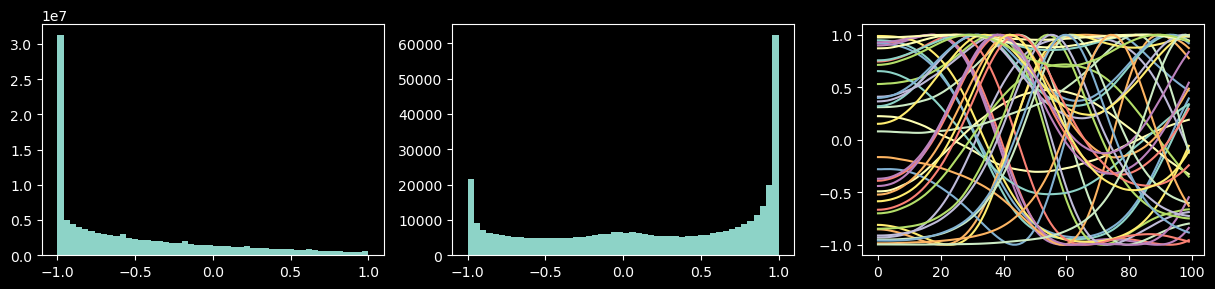

In [9]:
dataloader.plot_data_and_targets(data_type='train', plot_targets=(500,520))

In [5]:
a, b = dataloader.batch_data()

In [6]:
a.shape

(64, 40, 24, 24, 1)

In [7]:
b.shape

(64, 40, 2)

In [10]:
import jax.numpy as np
prepad = np.array(np.pad(a, ((0, 0), (20, 0), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0))
postpad = np.array(np.pad(a, ((0, 0), (0, 20), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0))
print(prepad)
print(postpad)
print(prepad.shape)
print(postpad.shape)

[[[[[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   ...

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]]


  [[[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.  

# Learner Test

In [1]:
from learner import Learner
from training import Training

In [2]:
training = Training()
learner = Learner(training)

In [3]:
learner.get_trainable_parameters()

[*] Trainable Parameters: 8664


In [14]:
learner.show_parameters()

AttributeError: "VmapGaussianRegressionModel" object has no attribute "<lambda>". If "<lambda>" is defined in '.setup()', remember these fields are only accessible from inside 'init' or 'apply'.

In [15]:
learner.print_shapes()

decoder_lvar.layers_0.bias (30,) float32
decoder_lvar.layers_0.kernel (32, 30) float32
decoder_lvar.layers_1.bias (2,) float32
decoder_lvar.layers_1.kernel (30, 2) float32
decoder_mu.layers_0.bias (30,) float32
decoder_mu.layers_0.kernel (32, 30) float32
decoder_mu.layers_1.bias (2,) float32
decoder_mu.layers_1.kernel (30, 2) float32
encoder.encoder.bias (32,) float32
encoder.encoder.kernel (1, 32) float32
encoder.layers_0.norm.bias (32,) float32
encoder.layers_0.norm.scale (32,) float32
encoder.layers_0.out2.bias (32,) float32
encoder.layers_0.out2.kernel (32, 32) float32
encoder.layers_0.seq.B (16, 32, 2) float32
encoder.layers_0.seq.C (32, 16, 2) float32
encoder.layers_0.seq.D (32,) float32
encoder.layers_0.seq.Lambda_im (16,) float32
encoder.layers_0.seq.Lambda_re (16,) float32
encoder.layers_0.seq.log_step (16, 1) float32
encoder.layers_1.norm.bias (32,) float32
encoder.layers_1.norm.scale (32,) float32
encoder.layers_1.out2.bias (32,) float32
encoder.layers_1.out2.kernel (32, 32)

In [34]:
# learning_rate_fn = learner.create_learning_rate_fn()
learning_rate_fn = learner.exponential_decay_fn

In [36]:
learning_rate_fn(1000)

0.001

# RNG Test

In [5]:
from jax import random

In [17]:
key = random.key(69)
key

Array((), dtype=key<fry>) overlaying:
[ 0 69]

In [18]:
init_rng, train_rng = random.split(key, num=2)
print(init_rng)
print(train_rng)

Array((), dtype=key<fry>) overlaying:
[3746304321 1047182288]
Array((), dtype=key<fry>) overlaying:
[3745723190 1458479275]


In [19]:
key = random.PRNGKey(69)
key

Array([ 0, 69], dtype=uint32)

In [20]:
init_rng, train_rng = random.split(key, num=2)
print(init_rng)
print(train_rng)

[3746304321 1047182288]
[3745723190 1458479275]


In [21]:
key, noise_rng, test_rng = random.split(key, num=3)
print(key, noise_rng, test_rng)

[2814327745 2391496948] [1174026990 2603783245] [2720540706 1040765532]


# SSM Test

## ssm test

In [1]:
from s5 import S5
from training import Training

In [3]:
training = Training()
s5 = S5(training.configs['parameters']['S5']).s5

In [5]:
s5

VmapGaussianRegressionModel(
    # attributes
    ssm = functools.partial(<class 'S5.s5.ssm.S5SSM'>, H=32, P=16, Lambda_re_init=Array([-0.49999994, -0.49999994, -0.49999994, -0.49999994, -0.49999994,
           -0.49999994, -0.49999994, -0.49999994, -0.49999994, -0.49999994,
           -0.49999994, -0.49999994, -0.49999994, -0.49999994, -0.49999994,
           -0.49999994], dtype=float32), Lambda_im_init=Array([-19.857405 ,  -5.3542137,  -1.9577932,  -0.427489 , -19.857405 ,
            -5.3542137,  -1.9577932,  -0.427489 , -19.857405 ,  -5.3542137,
            -1.9577932,  -0.427489 , -19.857405 ,  -5.3542137,  -1.9577932,
            -0.427489 ], dtype=float32), V=Array([[ 0.10672937-0.07382672j,  0.06078995+0.16030367j,
             0.02548362+0.2896217j ,  0.6058039 +0.0473051j ,
             0.        +0.j        ,  0.        +0.j        ,
             0.        +0.j        ,  0.        +0.j        ,
             0.        +0.j        ,  0.        +0.j        ,
             0.    

In [6]:
import jax.numpy as np

dummy_input = np.ones((1, 100, 24, 24, 1))
dummy_input.shape

(1, 100, 24, 24, 1)

In [8]:
from jax import random

variables = s5.init({"params": random.key(0), "dropout": random.key(69)}, dummy_input, None)
params = variables["params"]
# batch_stats = variables['batch_stats']

In [9]:
params

{'decoder_lvar': {'layers_0': {'bias': Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
   'kernel': Array([[ 0.05456224, -0.19073889, -0.03620662, ..., -0.23699392,
           -0.15379429, -0.04719176],
          [ 0.07735047,  0.01052934, -0.05086689, ..., -0.20796978,
            0.17935954, -0.19244632],
          [ 0.11183354,  0.11025661,  0.12287011, ..., -0.12275771,
            0.09540754, -0.2170602 ],
          ...,
          [-0.0044023 ,  0.26621217, -0.02577856, ...,  0.01845883,
            0.04395672,  0.22993255],
          [ 0.1644467 , -0.00712035,  0.14094564, ..., -0.10749123,
           -0.2755618 , -0.12087858],
          [-0.10237295, -0.07392638,  0.02568126, ..., -0.13532607,
           -0.08068283, -0.00837723]], dtype=float32)},
  'layers_1': {'bias': Array([0., 0.], dtype=float32),
   'kernel': Array([[-0.12949832, -0.09627718],
          [-0.2927815 , -

In [10]:
batch_stats

{'encoder': {'layers_0': {'norm': {'mean': Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],      dtype=float32),
    'var': Array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],      dtype=float32)}},
  'layers_1': {'norm': {'mean': Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],      dtype=float32),
    'var': Array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],      dtype=float32)}}}}

In [12]:
mean, var = s5.apply({"params": params}, dummy_input, None, rngs={"dropout": random.key(69)})

In [13]:
mean.shape

(1, 100, 2)

In [14]:
var.shape

(1, 100, 2)

In [15]:
import optax
from flax.training import train_state

def create_learning_rate_fn():
    warmup_fn = optax.linear_schedule(init_value=0., end_value=0.001, transition_steps=2000)
    cosine_fn = optax.cosine_decay_schedule(init_value=0.001, decay_steps=18000)
    schedule_fn = optax.join_schedules(schedules=[warmup_fn, cosine_fn], boundaries=[2000])
    return schedule_fn

def create_train_state(learning_rate_fn):
    tx = optax.adamw(learning_rate_fn, weight_decay=0.1)
    return train_state.TrainState.create(apply_fn=s5.apply, params=params, tx=tx)

In [16]:
learning_rate_fn = create_learning_rate_fn()

In [17]:
tx = optax.adamw(learning_rate_fn, weight_decay=0.1)
state = train_state.TrainState.create(apply_fn=s5.apply, params=params, tx=tx)

In [18]:
state

TrainState(step=0, apply_fn=<bound method Module.apply of VmapGaussianRegressionModel(
    # attributes
    ssm = functools.partial(<class 'S5.s5.ssm.S5SSM'>, H=64, P=32, Lambda_re_init=Array([-0.49999967, -0.49999967, -0.49999967, -0.49999967, -0.49999967,
           -0.49999967, -0.49999967, -0.49999967, -0.49999967, -0.49999967,
           -0.49999967, -0.49999967, -0.49999967, -0.49999967, -0.49999967,
           -0.49999967, -0.49999967, -0.49999967, -0.49999967, -0.49999967,
           -0.49999967, -0.49999967, -0.49999967, -0.49999967, -0.49999967,
           -0.49999967, -0.49999967, -0.49999967, -0.49999967, -0.49999967,
           -0.49999967, -0.49999967], dtype=float32), Lambda_im_init=Array([-80.966194 , -25.629253 , -13.834365 ,  -8.362114 ,  -5.090026 ,
            -2.8996723,  -1.3719904,  -0.3520182, -80.966194 , -25.629253 ,
           -13.834365 ,  -8.362114 ,  -5.090026 ,  -2.8996723,  -1.3719904,
            -0.3520182, -80.966194 , -25.629253 , -13.834365 ,  -8.36

In [24]:
mean, var = state.apply_fn({'params': params}, dummy_input, None, rngs={'dropout': random.key(69)})
mean, var = mean[:,-1,:], var[:,-1,:]

In [21]:
mean.shape

(1, 2)

In [22]:
var.shape

(1, 2)

## crypto test

In [1]:
from learner import Learner
from training import Training

In [2]:
training = Training()
learner = Learner(training)

In [12]:
training_steps = 100

In [33]:
import jax.numpy as np
from timeit import default_timer as dt

st = dt()
for steps in range(training_steps):
    print(f"Step: {steps+1}/{training_steps}", end='\r')
    batch_inputs = np.ones((128, 1000, 25))
    batch_labels = np.ones((128, 1000, 10))
    mask = np.ones_like(batch_labels)
    loss = learner.validate_batch(batch_inputs, batch_labels)
    # loss, lr = learner.train_batch(batch_inputs, batch_labels, steps, mask)
eval_time = dt() - st
eval_time

1.5493997019984818

In [ ]:
# inference time / inference + training time
# step * bs *  seq  = time
# 100 *  32 * 10000 = 3.17s  / 12.96s
# 100 *  64 * 10000 = 6.34s  / 24.56s
# 100 * 100 * 1000  = 1.25s  / 4.37s
# 100 * 128 * 1000  = 1.55s  / 5.45s
# 100 * 128 * 10000 = 12.55s / 50.17s
# 100 * 256 * 10000 = 24.19s
# 100 * 512 * 10000 = 48.45s

In [21]:
import numpy as np
from scipy import stats

# Given data points
batch_sizes = np.array([32, 64, 128, 256, 512])
times = np.array([3.17, 6.34, 12.55, 24.19, 48.45])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(batch_sizes, times)

# Predict the time for bs=100
bs_target = 100
time_predicted = slope * bs_target + intercept

print(f"Predicted time for bs=100: {time_predicted:.2f}s")

Predicted time for bs=100: 9.69s


# Training Test

In [1]:
from metrics import Metrics
from dataloader import PendulumDataloader
from learner import Learner
from training import Training

In [2]:
training = Training()
metrics = Metrics(training)
dataloader = PendulumDataloader(training)
learner = Learner(training)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ghostkiller2070. Use `wandb login --relogin` to force relogin


../wandb/debug.log has been deleted.
../wandb/debug-internal.log has been deleted.






In [3]:
training.train(metrics, dataloader, learner)

/home/ghostkiller/miniconda3/envs/S5/lib/python3.11/site-packages/jax/_src/lax/lax.py:2690: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)


Step: 19/20000





Learning Rate,▂▃▅▆██████▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
Train Loss,█▄▂▂▂▂▂▂▂▁▂▁▂▁▂▂▁▁▁▂▂▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
Val Loss,█▄▃▃▂▃▂▂▂▂▂▂▁▁▂▁▂▁▁▂▂▁▁▁▁▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁
Learning Rate,0.0
Train Loss,0.04671
Val Loss,0.14706


In [4]:
metrics.close_writer()

Learning Rate,▁▂▄▆████████████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄
Train Loss,▄▂▁▁▁▁█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Val Loss,▂▂▁▁▁▁▁█▂▂▂▃▃▃▃▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▃▃▂▃▃▃▃▃▃▃
Learning Rate,0.00055
Train Loss,1.83176
Val Loss,0.79972


# Testing Random Stuff

In [5]:
import jax.numpy as np

a = np.ones((5, 2))
for _ in range(a.shape[0]):
    a = a.at[_].set(_+1)
a

Array([[1., 1.],
       [2., 2.],
       [3., 3.],
       [4., 4.],
       [5., 5.]], dtype=float32)

In [7]:
for _ in range(8):
    print(a[_,0])

1.0
2.0
3.0
4.0
5.0
5.0
5.0
5.0


In [13]:
a[-99]

Array([1., 1.], dtype=float32)